## Final Project Submission

Please fill out:
* Student name: Andrew Wester
* Student pace: Full Time
* Scheduled project review date/time: TBD
* Instructor name: Rafael Carrasco
* Blog post URL:


## Dataset: Diabetes 130-US hospitals for years 1999-2008 Data Set
**Abstract**: This data has been prepared to analyze factors related to readmission as well as other outcomes pertaining to patients with diabetes.

**Data Set Information:**
- The dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria.

> 1) It is an inpatient encounter (a hospital admission).
>
> 2) It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.
>
> 3) The length of stay was at least 1 day and at most 14 days.
>
> 4) Laboratory tests were performed during the encounter.
>
> 5) Medications were administered during the encounter.

The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc.


## Attribute Information:
**Input variables:**

Detailed description of all the atrributes is provided in Table 1 Beata Strack, Jonathan P. DeShazo, Chris Gennings, Juan L. Olmo, Sebastian Ventura, Krzysztof J. Cios, and John N. Clore, “Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records,” BioMed Research International, vol. 2014, Article ID 781670, 11 pages, 2014.

**_SEE IMAGE_**
<img src='table1a.png'>

# 1. Load & Inspect the Data:

In [1]:
import pandas as pd
import numpy as np

from IPython.display import Image
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.externals.six import StringIO
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix, f1_score 
from sklearn.metrics import make_scorer, recall_score, roc_curve, precision_score
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('diabetic_data.csv')
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [4]:
data.isna().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

## Separate Features from Target Variable (Readmitted Column)

In [5]:
print(data.shape)
data.head()

(101766, 50)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


## Examine Features of Interest

Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64


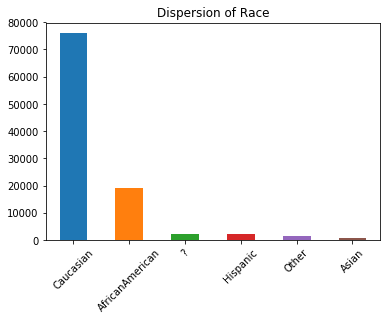

In [6]:
print(data.race.value_counts())
data.race.value_counts().plot(kind='bar')
plt.title('Dispersion of Race')
plt.xticks(rotation=45);

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64


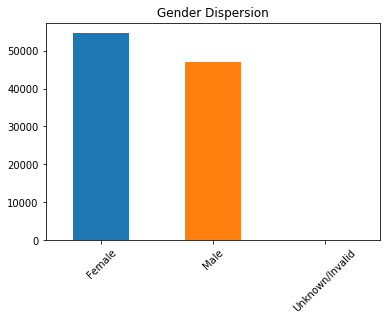

In [7]:
print(data.gender.value_counts())
data.gender.value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Gender Dispersion');

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64


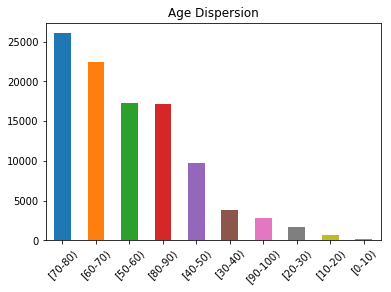

In [8]:
print(data.age.value_counts())
data.age.value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Age Dispersion');

None    96420
Norm     2597
>200     1485
>300     1264
Name: max_glu_serum, dtype: int64


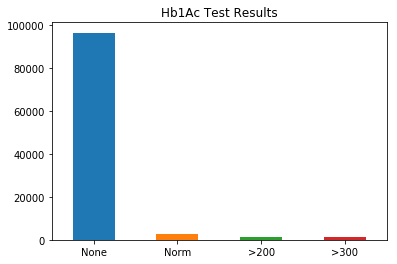

In [9]:
print(data.max_glu_serum.value_counts())
data.max_glu_serum.value_counts().plot(kind='bar')
plt.xticks(rotation='horizontal')
plt.title('Hb1Ac Test Results');

In [10]:
data.A1Cresult.value_counts()

None    84748
>8       8216
Norm     4990
>7       3812
Name: A1Cresult, dtype: int64

In [11]:
data.medical_specialty.value_counts()

?                                    49949
InternalMedicine                     14635
Emergency/Trauma                      7565
Family/GeneralPractice                7440
Cardiology                            5352
Surgery-General                       3099
Nephrology                            1613
Orthopedics                           1400
Orthopedics-Reconstructive            1233
Radiologist                           1140
Pulmonology                            871
Psychiatry                             854
Urology                                685
ObstetricsandGynecology                671
Surgery-Cardiovascular/Thoracic        652
Gastroenterology                       564
Surgery-Vascular                       533
Surgery-Neuro                          468
PhysicalMedicineandRehabilitation      391
Oncology                               348
Pediatrics                             254
Hematology/Oncology                    207
Neurology                              203
Pediatrics-

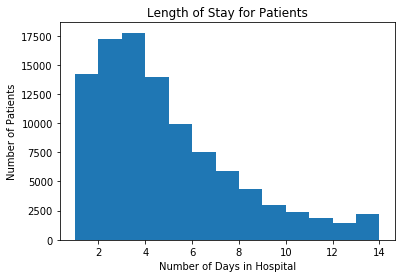

In [12]:
plt.hist(data.time_in_hospital, bins=13)
plt.xlabel('Number of Days in Hospital')
plt.ylabel('Number of Patients')
plt.title('Length of Stay for Patients');

# 2. Data Cleaning & Exploratory Data Analysis
 - Look at columns with data where '?' are used for placeholders
 - Determine any columns worth dropping ahead of time

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [14]:
# Drop encounter_id and patient_nbr as they won't be helpful
data.drop(columns=['encounter_id', 'patient_nbr'], inplace=True)

In [15]:
# Drop Weight Column, since 97% of data is missing
data.drop(columns='weight', inplace=True)

In [16]:
# Drop Payer Code, won't be something of interest to look at in the data
data.drop(columns='payer_code', inplace=True)

In [17]:
# Drop Race column rows with '?' as a value
data = data[data.race != '?']
data = data[data.race != 'Other']
data.race.value_counts()

Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Asian                641
Name: race, dtype: int64

In [18]:
data = data[data.gender != 'Unknown/Invalid']
data.gender.value_counts()

Female    52827
Male      45160
Name: gender, dtype: int64

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97987 entries, 0 to 101765
Data columns (total 46 columns):
race                        97987 non-null object
gender                      97987 non-null object
age                         97987 non-null object
admission_type_id           97987 non-null int64
discharge_disposition_id    97987 non-null int64
admission_source_id         97987 non-null int64
time_in_hospital            97987 non-null int64
medical_specialty           97987 non-null object
num_lab_procedures          97987 non-null int64
num_procedures              97987 non-null int64
num_medications             97987 non-null int64
number_outpatient           97987 non-null int64
number_emergency            97987 non-null int64
number_inpatient            97987 non-null int64
diag_1                      97987 non-null object
diag_2                      97987 non-null object
diag_3                      97987 non-null object
number_diagnoses            97987 non-null int64
m

In [20]:
# Replace '?' values for Medical Specialty with 'Missing', not removing column yet as it could bring value later
data.medical_specialty.replace('?', 'Missing', inplace=True)
data.medical_specialty.value_counts()

Missing                              48099
InternalMedicine                     14032
Emergency/Trauma                      7289
Family/GeneralPractice                7177
Cardiology                            5160
Surgery-General                       2977
Nephrology                            1584
Orthopedics                           1366
Orthopedics-Reconstructive            1180
Radiologist                           1109
Pulmonology                            827
Psychiatry                             823
Urology                                658
ObstetricsandGynecology                644
Surgery-Cardiovascular/Thoracic        619
Gastroenterology                       549
Surgery-Vascular                       530
Surgery-Neuro                          454
PhysicalMedicineandRehabilitation      374
Oncology                               342
Pediatrics                             245
Hematology/Oncology                    202
Neurology                              191
Pediatrics-

In [21]:
medications = data.iloc[:, 19:43]

In [22]:
medications.head()

,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,...,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone
0,None,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
1,None,No,No,No,No,No,No,No,No,No,...,No,No,No,No,Up,No,No,No,No,No
2,None,No,No,No,No,No,No,Steady,No,No,...,No,No,No,No,No,No,No,No,No,No
3,None,No,No,No,No,No,No,No,No,No,...,No,No,No,No,Up,No,No,No,No,No
4,None,No,No,No,No,No,No,Steady,No,No,...,No,No,No,No,Steady,No,No,No,No,No


In [23]:
# Dropping medication columns to perhaps come back to later
data.drop(columns=medications.columns, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97987 entries, 0 to 101765
Data columns (total 22 columns):
race                        97987 non-null object
gender                      97987 non-null object
age                         97987 non-null object
admission_type_id           97987 non-null int64
discharge_disposition_id    97987 non-null int64
admission_source_id         97987 non-null int64
time_in_hospital            97987 non-null int64
medical_specialty           97987 non-null object
num_lab_procedures          97987 non-null int64
num_procedures              97987 non-null int64
num_medications             97987 non-null int64
number_outpatient           97987 non-null int64
number_emergency            97987 non-null int64
number_inpatient            97987 non-null int64
diag_1                      97987 non-null object
diag_2                      97987 non-null object
diag_3                      97987 non-null object
number_diagnoses            97987 non-null int64
m

In [24]:
data.diabetesMed.replace('Yes', 1, inplace=True)
data.diabetesMed.replace('No', 0, inplace=True)
data.diabetesMed.value_counts()

1    75274
0    22713
Name: diabetesMed, dtype: int64

In [25]:
data.change.replace('No', 0, inplace=True)
data.change.replace('Ch', 1, inplace=True)
data.change.value_counts()

0    52885
1    45102
Name: change, dtype: int64

In [26]:
# Drop diag_1, diag_2, diag_3 for the moment
data.drop(columns=['diag_1', 'diag_2', 'diag_3'], inplace=True)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97987 entries, 0 to 101765
Data columns (total 19 columns):
race                        97987 non-null object
gender                      97987 non-null object
age                         97987 non-null object
admission_type_id           97987 non-null int64
discharge_disposition_id    97987 non-null int64
admission_source_id         97987 non-null int64
time_in_hospital            97987 non-null int64
medical_specialty           97987 non-null object
num_lab_procedures          97987 non-null int64
num_procedures              97987 non-null int64
num_medications             97987 non-null int64
number_outpatient           97987 non-null int64
number_emergency            97987 non-null int64
number_inpatient            97987 non-null int64
number_diagnoses            97987 non-null int64
max_glu_serum               97987 non-null object
change                      97987 non-null int64
diabetesMed                 97987 non-null int64
rea

# 3. Preprocessing

## Define Target and Feature Variables

In [28]:
target = data.readmitted
features = data.drop(columns='readmitted')

#### Make Dummies for Features

In [29]:
features = pd.get_dummies(features)
features.head()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,medical_specialty_Surgery-Plastic,medical_specialty_Surgery-PlasticwithinHeadandNeck,medical_specialty_Surgery-Thoracic,medical_specialty_Surgery-Vascular,medical_specialty_SurgicalSpecialty,medical_specialty_Urology,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm
0,6,25,1,1,41,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,1,7,3,59,0,18,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,1,7,2,11,5,13,2,0,1,...,0,0,0,0,0,0,0,0,1,0
3,1,1,7,2,44,1,16,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,1,7,1,51,0,8,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [30]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [31]:
df = pd.DataFrame(scaled_features, index=features.index, columns=features.columns)
df.head()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,medical_specialty_Surgery-Plastic,medical_specialty_Surgery-PlasticwithinHeadandNeck,medical_specialty_Surgery-Thoracic,medical_specialty_Surgery-Vascular,medical_specialty_SurgicalSpecialty,medical_specialty_Urology,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm
0,2.740623,4.000630,-1.170204,-1.138710,-0.105086,-0.78615,-1.853242,-0.292645,-0.214059,-0.506680,...,-0.019954,-0.003195,-0.032281,-0.073745,-0.01779,-0.082223,-0.122256,-0.113073,0.237213,-0.163131
1,-0.707094,-0.516886,0.301310,-0.468947,0.810039,-0.78615,0.241579,-0.292645,-0.214059,-0.506680,...,-0.019954,-0.003195,-0.032281,-0.073745,-0.01779,-0.082223,-0.122256,-0.113073,0.237213,-0.163131
2,-0.707094,-0.516886,0.301310,-0.803828,-1.630296,2.15245,-0.374545,1.267497,-0.214059,0.277649,...,-0.019954,-0.003195,-0.032281,-0.073745,-0.01779,-0.082223,-0.122256,-0.113073,0.237213,-0.163131
3,-0.707094,-0.516886,0.301310,-0.803828,0.047435,-0.19843,-0.004871,-0.292645,-0.214059,-0.506680,...,-0.019954,-0.003195,-0.032281,-0.073745,-0.01779,-0.082223,-0.122256,-0.113073,0.237213,-0.163131
4,-0.707094,-0.516886,0.301310,-1.138710,0.403317,-0.78615,-0.990669,-0.292645,-0.214059,-0.506680,...,-0.019954,-0.003195,-0.032281,-0.073745,-0.01779,-0.082223,-0.122256,-0.113073,0.237213,-0.163131


NO     52402
>30    34561
<30    11024
Name: readmitted, dtype: int64


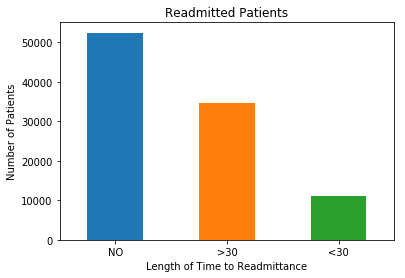

In [32]:
print(target.value_counts())
target.value_counts().plot(kind='bar')
plt.title('Readmitted Patients')
plt.xlabel('Length of Time to Readmittance')
plt.xticks(rotation='horizontal')
plt.ylabel('Number of Patients');

In [33]:
data.readmitted.value_counts()

NO     52402
>30    34561
<30    11024
Name: readmitted, dtype: int64

#### Change Values in Target Column to Numeric

In [34]:
target = target.replace('NO', 1)
target = target.replace('>30', 0)
target = target.replace('<30', 0)
target.value_counts()

1    52402
0    45585
Name: readmitted, dtype: int64

# 4. Modeling:
- Feature Importance Visualization
- Visualize Effect of Different Hyperparameter Values
- Logistic Regression
- Grid Search
    - Random Forest
    - AdaBoost Classifier
    - Decision Tree
- Model Comparison
- Refit Decision Tree
- Violin Plots

In [35]:
X = features
y = target
print(X.shape, y.shape)

(97987, 106) (97987,)


## Train-Test-Split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=25)

In [37]:
print(X_train.shape, X_test.shape)
print('-'*25)
print(y_train.shape, y_test.shape)

(73490, 106) (24497, 106)
-------------------------
(73490,) (24497,)


In [38]:
# Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=25)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=25,
            splitter='best')

In [39]:
# RECALL: TP / (TP+FN)
# PRECISION: TP / (TP+FP)
# F1 SCORE: (2*Prec*Recall) / (Prec + Recall)
# ACCURACY: (TP + TN) / (TP + FP + TN + FN)

In [40]:
# Maximizing RECALL is the same as minimizing FALSE NEGATIVES

In [41]:
# Maximizing PRECISION is the same as minimizing FALSE POSITIVES

In [42]:
# Maximizing F1 SCORE is the same as maximizing PRECISION & RECALL (Minimizing FALSE POSITIVE & FALSE NEGATIVE)

In [43]:
# Grid Search can choose what score you want to maximize (precision/recall)

In [44]:
# WE WANT TO MINIMIZE FALSE NEGATIVES -- This way hospitals won't be expecting fewer number of patients...
# Which means if the hospital is staffed for 100 patients daily, but 250 show up, hospital will be understaffed...
# As opposed to being staffed for 250 and having 100 patients daily
# WE NEED TO MAXIMIZE RECALL!!!

In [45]:
# Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=25)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=25,
            splitter='best')

In [46]:
y_preds = clf.predict(X_test)

In [47]:
accuracy_score(y_test, y_preds)

0.5656611013593501

In [48]:
recall_score(y_test, y_preds)

0.599525340682897

In [49]:
print(confusion_matrix(y_test, y_preds))
print(classification_report(y_test, y_preds))

[[6026 5409]
 [5231 7831]]
              precision    recall  f1-score   support

           0       0.54      0.53      0.53     11435
           1       0.59      0.60      0.60     13062

   micro avg       0.57      0.57      0.57     24497
   macro avg       0.56      0.56      0.56     24497
weighted avg       0.57      0.57      0.57     24497



In [50]:
def plot_feature_importances(model, figsize=(12,12)):
    
    """Visualize feature importance of selected model as determined by feature_importances_ method."""
    
    n_features = X_train.shape[1]
    plt.figure(figsize=figsize)
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")

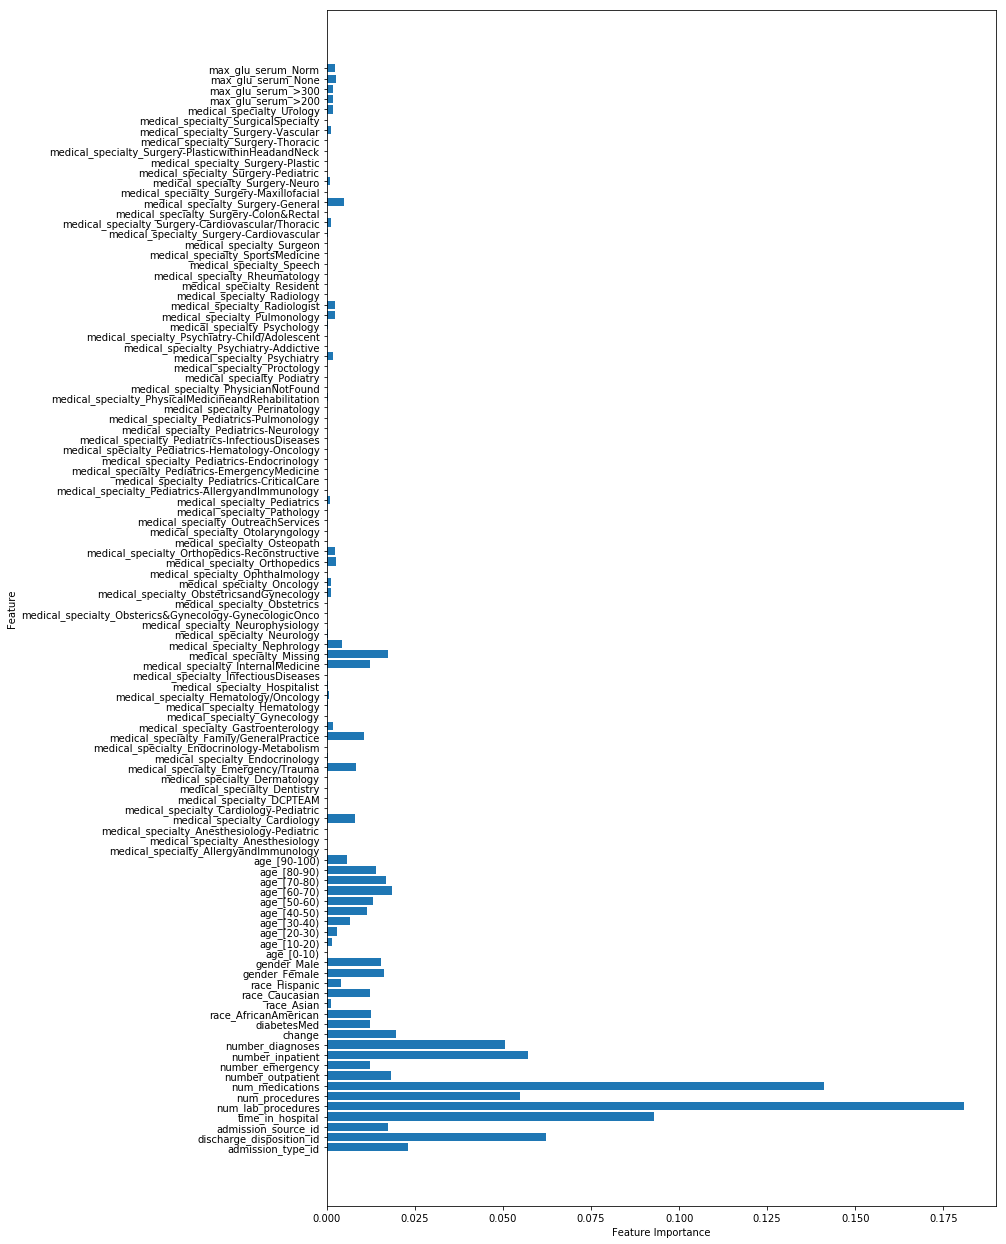

In [51]:
plot_feature_importances(clf, figsize=(12, 22))

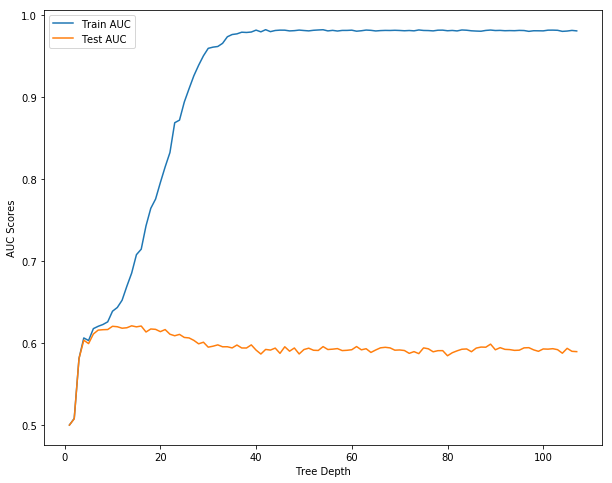

In [51]:
# # Visualize effect of different max_depths on AUC scores

# max_depths = np.linspace(1,107,107,endpoint=True)
# train_auc = []
# test_auc = []

# for depth in max_depths:
    
#     clf = RandomForestClassifier(max_depth=depth)
#     clf.fit(X_train, y_train)
#     train_pred = clf.predict(X_train)
#     fpr, tpr, thresh = roc_curve(y_train, train_pred)
#     roc_auc = auc(fpr, tpr)
#     train_auc.append(roc_auc)
    
#     test_pred = clf.predict(X_test)
#     fpr, tpr, thresh = roc_curve(y_test, test_pred)
#     roc_auc = auc(fpr, tpr)
#     test_auc.append(roc_auc)

# plt.figure(figsize=(10,8))
# plt.plot(max_depths, train_auc, label='Train AUC')
# plt.plot(max_depths, test_auc, label='Test AUC')
# plt.xlabel('Tree Depth')
# plt.ylabel('AUC Scores')
# plt.legend(loc='best')
# plt.show();

## Restore data to pre-dummies columns and remove medical specialty column

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97987 entries, 0 to 101765
Data columns (total 19 columns):
race                        97987 non-null object
gender                      97987 non-null object
age                         97987 non-null object
admission_type_id           97987 non-null int64
discharge_disposition_id    97987 non-null int64
admission_source_id         97987 non-null int64
time_in_hospital            97987 non-null int64
medical_specialty           97987 non-null object
num_lab_procedures          97987 non-null int64
num_procedures              97987 non-null int64
num_medications             97987 non-null int64
number_outpatient           97987 non-null int64
number_emergency            97987 non-null int64
number_inpatient            97987 non-null int64
number_diagnoses            97987 non-null int64
max_glu_serum               97987 non-null object
change                      97987 non-null int64
diabetesMed                 97987 non-null int64
rea

In [53]:
data.drop(columns='medical_specialty', inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97987 entries, 0 to 101765
Data columns (total 18 columns):
race                        97987 non-null object
gender                      97987 non-null object
age                         97987 non-null object
admission_type_id           97987 non-null int64
discharge_disposition_id    97987 non-null int64
admission_source_id         97987 non-null int64
time_in_hospital            97987 non-null int64
num_lab_procedures          97987 non-null int64
num_procedures              97987 non-null int64
num_medications             97987 non-null int64
number_outpatient           97987 non-null int64
number_emergency            97987 non-null int64
number_inpatient            97987 non-null int64
number_diagnoses            97987 non-null int64
max_glu_serum               97987 non-null object
change                      97987 non-null int64
diabetesMed                 97987 non-null int64
readmitted                  97987 non-null object
dty

In [54]:
target_a = data.readmitted
features_a = data.drop(columns='readmitted')
print(target_a.shape, features_a.shape)

(97987,) (97987, 17)


In [55]:
target_a.value_counts()

NO     52402
>30    34561
<30    11024
Name: readmitted, dtype: int64

In [56]:
target_a = target_a.replace('NO', 1)
target_a = target_a.replace('>30', 0)
target_a = target_a.replace('<30', 0)
target_a.value_counts()

1    52402
0    45585
Name: readmitted, dtype: int64

In [57]:
features_a = pd.get_dummies(features_a)
features_a.head()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm
0,6,25,1,1,41,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,1,7,3,59,0,18,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,1,7,2,11,5,13,2,0,1,...,0,0,0,0,0,0,0,0,1,0
3,1,1,7,2,44,1,16,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,1,7,1,51,0,8,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [58]:
scaler = StandardScaler()
scaled_features_a = scaler.fit_transform(features_a)

In [59]:
df1 = pd.DataFrame(scaled_features_a, index=features_a.index, columns=features_a.columns)
df1.head()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm
0,2.740623,4.000630,-1.170204,-1.138710,-0.105086,-0.78615,-1.853242,-0.292645,-0.214059,-0.506680,...,-0.323960,-0.451394,-0.531351,-0.587505,-0.452442,-0.168331,-0.122256,-0.113073,0.237213,-0.163131
1,-0.707094,-0.516886,0.301310,-0.468947,0.810039,-0.78615,0.241579,-0.292645,-0.214059,-0.506680,...,-0.323960,-0.451394,-0.531351,-0.587505,-0.452442,-0.168331,-0.122256,-0.113073,0.237213,-0.163131
2,-0.707094,-0.516886,0.301310,-0.803828,-1.630296,2.15245,-0.374545,1.267497,-0.214059,0.277649,...,-0.323960,-0.451394,-0.531351,-0.587505,-0.452442,-0.168331,-0.122256,-0.113073,0.237213,-0.163131
3,-0.707094,-0.516886,0.301310,-0.803828,0.047435,-0.19843,-0.004871,-0.292645,-0.214059,-0.506680,...,-0.323960,-0.451394,-0.531351,-0.587505,-0.452442,-0.168331,-0.122256,-0.113073,0.237213,-0.163131
4,-0.707094,-0.516886,0.301310,-1.138710,0.403317,-0.78615,-0.990669,-0.292645,-0.214059,-0.506680,...,3.086796,-0.451394,-0.531351,-0.587505,-0.452442,-0.168331,-0.122256,-0.113073,0.237213,-0.163131


1    52402
0    45585
Name: readmitted, dtype: int64


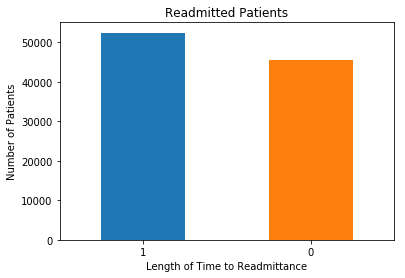

In [60]:
print(target_a.value_counts())
target_a.value_counts().plot(kind='bar')
plt.title('Readmitted Patients')
plt.xlabel('Length of Time to Readmittance')
plt.xticks(rotation='horizontal')
plt.ylabel('Number of Patients');

In [61]:
X1 = features_a
y1 = target_a

In [62]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=25)

In [63]:
print(X1_train.shape, X1_test.shape)
print('-'*25)
print(y1_train.shape, y1_test.shape)

(73490, 33) (24497, 33)
-------------------------
(73490,) (24497,)


In [64]:
# Decision Tree Classifier
clf1 = DecisionTreeClassifier(random_state=25)
clf1.fit(X1_train, y1_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=25,
            splitter='best')

In [65]:
y1_preds = clf1.predict(X1_test)

In [66]:
accuracy_score(y1_test, y1_preds)

0.5657835653345308

In [67]:
recall_score(y1_test, y1_preds)

0.5986066452304395

In [68]:
print(confusion_matrix(y1_test, y1_preds))
print(classification_report(y1_test, y1_preds))

[[6041 5394]
 [5243 7819]]
              precision    recall  f1-score   support

           0       0.54      0.53      0.53     11435
           1       0.59      0.60      0.60     13062

   micro avg       0.57      0.57      0.57     24497
   macro avg       0.56      0.56      0.56     24497
weighted avg       0.57      0.57      0.57     24497



In [69]:
def plot_feature_importances1(model, figsize=(12,12)):
    
    """Visualize feature importance of selected model as determined by feature_importances_ method."""
    
    n_features = X1_train.shape[1]
    plt.figure(figsize=figsize)
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X1_train.columns.values) 
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")

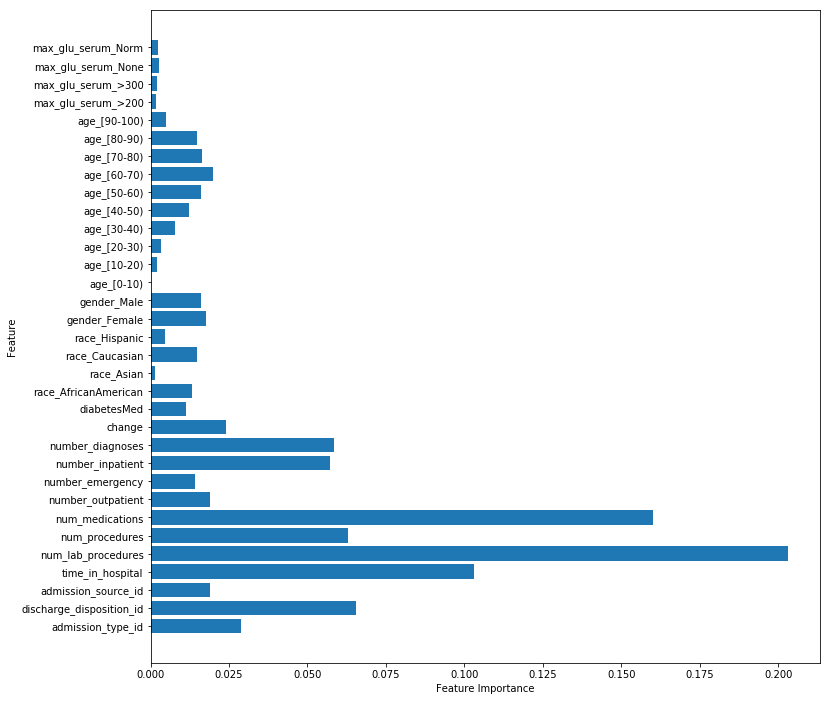

In [70]:
plot_feature_importances1(clf1)

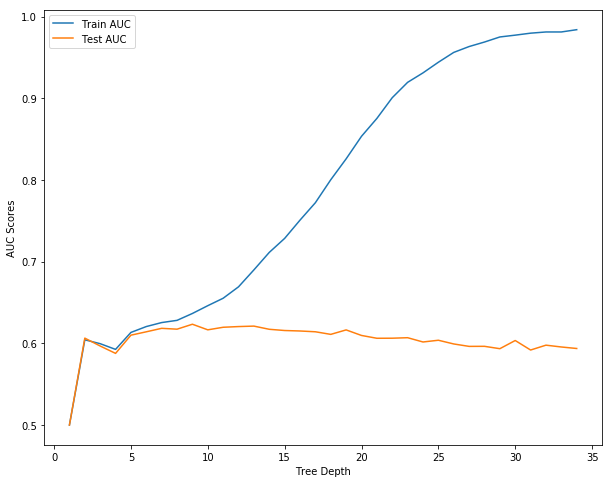

In [71]:
# # Visualize effect of different max_depths on AUC scores

# max_depths = np.linspace(1,34,34,endpoint=True)
# train_auc = []
# test_auc = []

# for depth in max_depths:
    
#     clf = RandomForestClassifier(max_depth=depth)
#     clf.fit(X1_train, y1_train)
#     train_pred = clf.predict(X1_train)
#     fpr, tpr, thresh = roc_curve(y1_train, train_pred)
#     roc_auc = auc(fpr, tpr)
#     train_auc.append(roc_auc)
    
#     test_pred = clf.predict(X1_test)
#     fpr, tpr, thresh = roc_curve(y1_test, test_pred)
#     roc_auc = auc(fpr, tpr)
#     test_auc.append(roc_auc)

# plt.figure(figsize=(10,8))
# plt.plot(max_depths, train_auc, label='Train AUC')
# plt.plot(max_depths, test_auc, label='Test AUC')
# plt.xlabel('Tree Depth')
# plt.ylabel('AUC Scores')
# plt.legend(loc='best')
# plt.show();

# Drop Information with Low Feature Importance

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97987 entries, 0 to 101765
Data columns (total 18 columns):
race                        97987 non-null object
gender                      97987 non-null object
age                         97987 non-null object
admission_type_id           97987 non-null int64
discharge_disposition_id    97987 non-null int64
admission_source_id         97987 non-null int64
time_in_hospital            97987 non-null int64
num_lab_procedures          97987 non-null int64
num_procedures              97987 non-null int64
num_medications             97987 non-null int64
number_outpatient           97987 non-null int64
number_emergency            97987 non-null int64
number_inpatient            97987 non-null int64
number_diagnoses            97987 non-null int64
max_glu_serum               97987 non-null object
change                      97987 non-null int64
diabetesMed                 97987 non-null int64
readmitted                  97987 non-null object
dty

In [72]:
#Drop max_glu_serum, admission_source_id, number_outpatient, and number_emergency columns'
data.drop(columns=['max_glu_serum', 'admission_source_id', 'number_outpatient', 'number_emergency'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97987 entries, 0 to 101765
Data columns (total 14 columns):
race                        97987 non-null object
gender                      97987 non-null object
age                         97987 non-null object
admission_type_id           97987 non-null int64
discharge_disposition_id    97987 non-null int64
time_in_hospital            97987 non-null int64
num_lab_procedures          97987 non-null int64
num_procedures              97987 non-null int64
num_medications             97987 non-null int64
number_inpatient            97987 non-null int64
number_diagnoses            97987 non-null int64
change                      97987 non-null int64
diabetesMed                 97987 non-null int64
readmitted                  97987 non-null object
dtypes: int64(10), object(4)
memory usage: 11.2+ MB


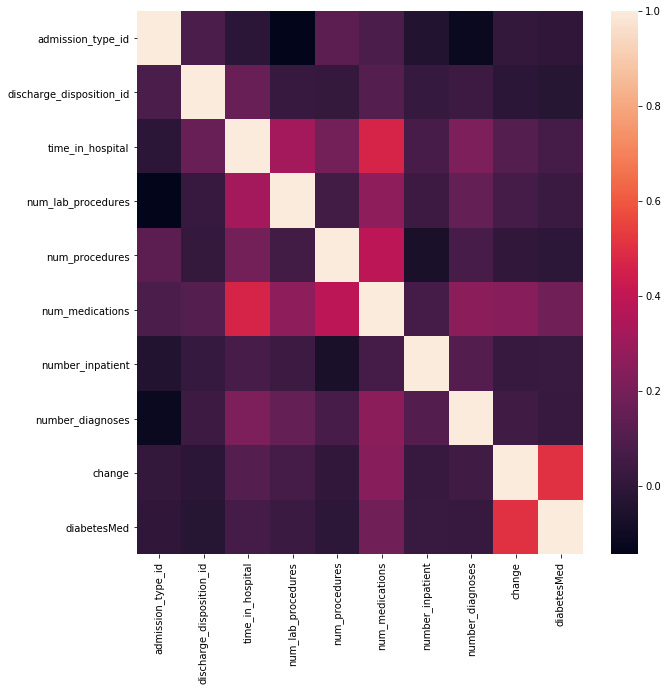

In [73]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr());

In [74]:
target_b = data.readmitted
features_b = data.drop(columns='readmitted')
print(target_b.shape, features_b.shape)

(97987,) (97987, 13)


In [75]:
target_b.value_counts()

NO     52402
>30    34561
<30    11024
Name: readmitted, dtype: int64

In [76]:
target_b = target_b.replace('NO', 1)
target_b = target_b.replace('>30', 0)
target_b = target_b.replace('<30', 0)
target_b.value_counts()

1    52402
0    45585
Name: readmitted, dtype: int64

In [77]:
features_b = pd.get_dummies(features_b)
features_b.head()

,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_inpatient,number_diagnoses,change,diabetesMed,...,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100)
0,6,25,1,41,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,1,3,59,0,18,0,9,1,1,...,0,1,0,0,0,0,0,0,0,0
2,1,1,2,11,5,13,1,6,0,1,...,0,0,1,0,0,0,0,0,0,0
3,1,1,2,44,1,16,0,7,1,1,...,0,0,0,1,0,0,0,0,0,0
4,1,1,1,51,0,8,0,5,1,1,...,0,0,0,0,1,0,0,0,0,0


In [78]:
scaler = StandardScaler()
scaled_features_b = scaler.fit_transform(features_b)

In [79]:
df2 = pd.DataFrame(scaled_features_b, index=features_b.index, columns=features_b.columns)
df2.head()

,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_inpatient,number_diagnoses,change,diabetesMed,...,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100)
0,2.740623,4.000630,-1.138710,-0.105086,-0.78615,-1.853242,-0.506680,-3.348557,-0.923489,-1.820477,...,25.042400,-0.083099,-0.128184,-0.195719,-0.323960,-0.451394,-0.531351,-0.587505,-0.452442,-0.168331
1,-0.707094,-0.516886,-0.468947,0.810039,-0.78615,0.241579,-0.506680,0.809140,1.082850,0.549307,...,-0.039932,12.033868,-0.128184,-0.195719,-0.323960,-0.451394,-0.531351,-0.587505,-0.452442,-0.168331
2,-0.707094,-0.516886,-0.803828,-1.630296,2.15245,-0.374545,0.277649,-0.749996,-0.923489,0.549307,...,-0.039932,-0.083099,7.801313,-0.195719,-0.323960,-0.451394,-0.531351,-0.587505,-0.452442,-0.168331
3,-0.707094,-0.516886,-0.803828,0.047435,-0.19843,-0.004871,-0.506680,-0.230284,1.082850,0.549307,...,-0.039932,-0.083099,-0.128184,5.109371,-0.323960,-0.451394,-0.531351,-0.587505,-0.452442,-0.168331
4,-0.707094,-0.516886,-1.138710,0.403317,-0.78615,-0.990669,-0.506680,-1.269709,1.082850,0.549307,...,-0.039932,-0.083099,-0.128184,-0.195719,3.086796,-0.451394,-0.531351,-0.587505,-0.452442,-0.168331


In [80]:
features_b = df2

1    52402
0    45585
Name: readmitted, dtype: int64


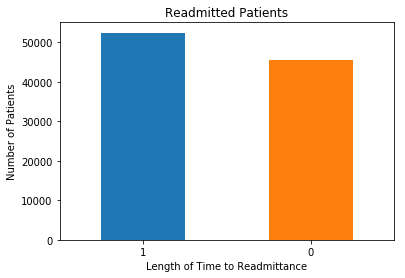

In [81]:
print(target_b.value_counts())
target_b.value_counts().plot(kind='bar')
plt.title('Readmitted Patients')
plt.xlabel('Length of Time to Readmittance')
plt.xticks(rotation='horizontal')
plt.ylabel('Number of Patients');

In [82]:
X2 = features_b
y2 = target_b

In [83]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=25)

In [84]:
print(X2_train.shape, X2_test.shape)
print('-'*25)
print(y2_train.shape, y2_test.shape)

(73490, 26) (24497, 26)
-------------------------
(73490,) (24497,)


In [85]:
# Decision Tree Classifier
clf2 = DecisionTreeClassifier(random_state=25)
clf2.fit(X2_train, y2_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=25,
            splitter='best')

In [86]:
y2_preds = clf2.predict(X2_test)

In [87]:
accuracy_score(y2_test, y2_preds)

0.5552516634689962

In [88]:
recall_score(y2_test, y2_preds)

0.5855152350329199

In [89]:
print(confusion_matrix(y2_test, y2_preds))
print(classification_report(y2_test, y2_preds))

[[5954 5481]
 [5414 7648]]
              precision    recall  f1-score   support

           0       0.52      0.52      0.52     11435
           1       0.58      0.59      0.58     13062

   micro avg       0.56      0.56      0.56     24497
   macro avg       0.55      0.55      0.55     24497
weighted avg       0.56      0.56      0.56     24497



In [90]:
def plot_feature_importances2(model, figsize=(12,12)):
    
    """Visualize feature importance of selected model as determined by feature_importances_ method."""
    
    n_features = X2_train.shape[1]
    plt.figure(figsize=figsize)
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X2_train.columns.values) 
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")

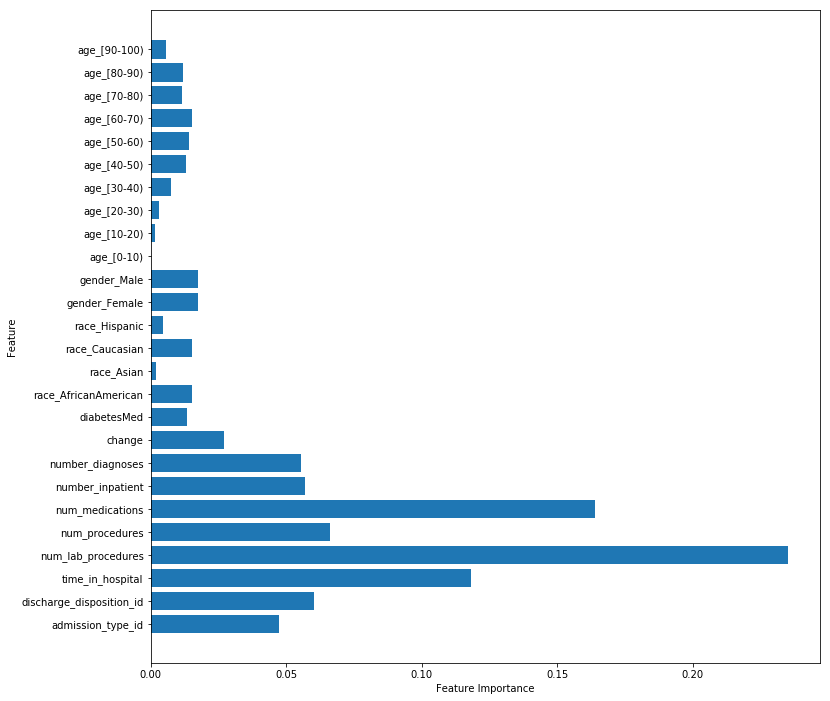

In [91]:
plot_feature_importances2(clf2)

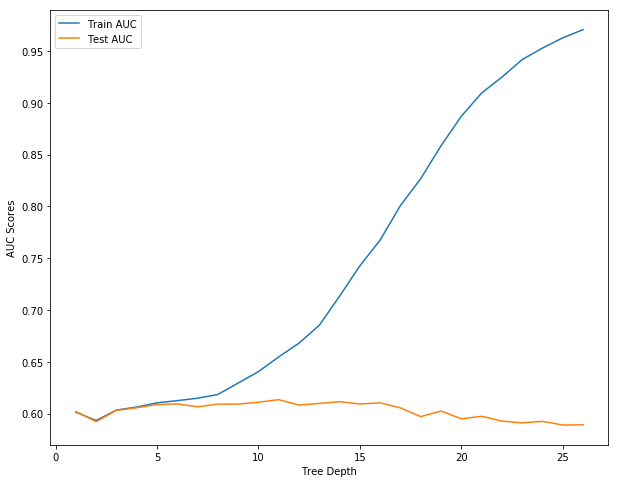

In [93]:
# # Visualize effect of different max_depths on AUC scores

# max_depths = np.linspace(1,26,26,endpoint=True)
# train_auc = []
# test_auc = []

# for depth in max_depths:
    
#     clf = RandomForestClassifier(max_depth=depth)
#     clf.fit(X2_train, y2_train)
#     train_pred = clf.predict(X2_train)
#     fpr, tpr, thresh = roc_curve(y2_train, train_pred)
#     roc_auc = auc(fpr, tpr)
#     train_auc.append(roc_auc)
    
#     test_pred = clf.predict(X2_test)
#     fpr, tpr, thresh = roc_curve(y2_test, test_pred)
#     roc_auc = auc(fpr, tpr)
#     test_auc.append(roc_auc)

# plt.figure(figsize=(10,8))
# plt.plot(max_depths, train_auc, label='Train AUC')
# plt.plot(max_depths, test_auc, label='Test AUC')
# plt.xlabel('Tree Depth')
# plt.ylabel('AUC Scores')
# plt.legend(loc='best')
# plt.show();

In [92]:
rafclf = RandomForestClassifier(random_state=25)
rafclf.fit(X2_train, y2_train)
rafpreds = rafclf.predict(X2_test)
rafclf.score(X2_test, y2_test)

0.5839490549863249

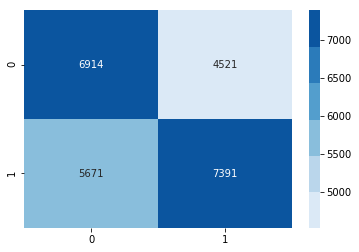

In [93]:
cm = confusion_matrix(y2_test, rafpreds)
sns.heatmap(cm, annot=True, cmap=sns.color_palette('Blues'), fmt='0.16g')

In [94]:
scores = rafclf.predict_proba(X2_test)

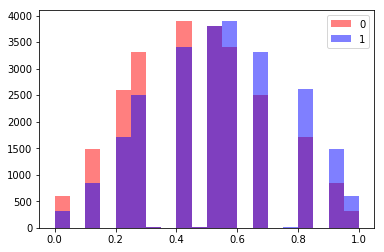

In [95]:
plt.hist(scores[:, 0], color='r', label='0', alpha=0.5, bins=20)
plt.hist(scores[:, 1], color='b', label='1', alpha=0.5, bins=20)
plt.legend()

In [96]:
X2_train.head()

,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_inpatient,number_diagnoses,change,diabetesMed,...,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100)
92240,-0.017551,-0.516886,-0.468947,-0.308448,-0.78615,-0.620994,0.277649,-0.230284,-0.923489,0.549307,...,-0.039932,-0.083099,-0.128184,-0.195719,-0.323960,2.215359,-0.531351,-0.587505,-0.452442,-0.168331
11161,-0.707094,-0.516886,-0.468947,0.708359,-0.19843,0.118354,-0.506680,-1.789421,1.082850,0.549307,...,-0.039932,-0.083099,-0.128184,-0.195719,3.086796,-0.451394,-0.531351,-0.587505,-0.452442,-0.168331
70978,-0.707094,3.812400,1.205459,0.250796,1.56473,1.966725,-0.506680,0.809140,1.082850,0.549307,...,-0.039932,-0.083099,-0.128184,-0.195719,-0.323960,-0.451394,-0.531351,-0.587505,2.210227,-0.168331
2902,-0.707094,-0.516886,0.870578,0.403317,-0.78615,0.611253,1.061978,0.809140,1.082850,0.549307,...,-0.039932,-0.083099,-0.128184,-0.195719,-0.323960,-0.451394,1.881994,-0.587505,-0.452442,-0.168331
82672,-0.707094,-0.516886,-0.468947,1.318442,-0.78615,0.364804,-0.506680,0.809140,1.082850,0.549307,...,-0.039932,-0.083099,-0.128184,-0.195719,-0.323960,-0.451394,-0.531351,1.702113,-0.452442,-0.168331


In [97]:
df2.head()

,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_inpatient,number_diagnoses,change,diabetesMed,...,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100)
0,2.740623,4.000630,-1.138710,-0.105086,-0.78615,-1.853242,-0.506680,-3.348557,-0.923489,-1.820477,...,25.042400,-0.083099,-0.128184,-0.195719,-0.323960,-0.451394,-0.531351,-0.587505,-0.452442,-0.168331
1,-0.707094,-0.516886,-0.468947,0.810039,-0.78615,0.241579,-0.506680,0.809140,1.082850,0.549307,...,-0.039932,12.033868,-0.128184,-0.195719,-0.323960,-0.451394,-0.531351,-0.587505,-0.452442,-0.168331
2,-0.707094,-0.516886,-0.803828,-1.630296,2.15245,-0.374545,0.277649,-0.749996,-0.923489,0.549307,...,-0.039932,-0.083099,7.801313,-0.195719,-0.323960,-0.451394,-0.531351,-0.587505,-0.452442,-0.168331
3,-0.707094,-0.516886,-0.803828,0.047435,-0.19843,-0.004871,-0.506680,-0.230284,1.082850,0.549307,...,-0.039932,-0.083099,-0.128184,5.109371,-0.323960,-0.451394,-0.531351,-0.587505,-0.452442,-0.168331
4,-0.707094,-0.516886,-1.138710,0.403317,-0.78615,-0.990669,-0.506680,-1.269709,1.082850,0.549307,...,-0.039932,-0.083099,-0.128184,-0.195719,3.086796,-0.451394,-0.531351,-0.587505,-0.452442,-0.168331


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97987 entries, 0 to 101765
Data columns (total 14 columns):
race                        97987 non-null object
gender                      97987 non-null object
age                         97987 non-null object
admission_type_id           97987 non-null int64
discharge_disposition_id    97987 non-null int64
time_in_hospital            97987 non-null int64
num_lab_procedures          97987 non-null int64
num_procedures              97987 non-null int64
num_medications             97987 non-null int64
number_inpatient            97987 non-null int64
number_diagnoses            97987 non-null int64
change                      97987 non-null int64
diabetesMed                 97987 non-null int64
readmitted                  97987 non-null object
dtypes: int64(10), object(4)
memory usage: 11.2+ MB


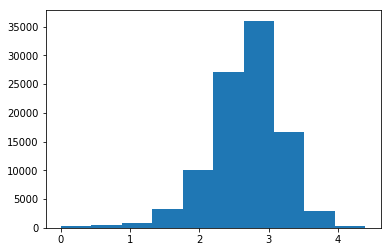

In [99]:
plt.hist(np.log(data.num_medications));

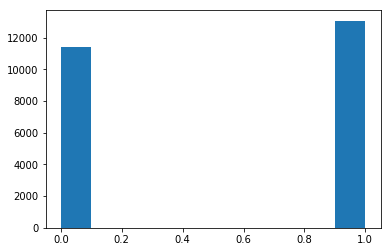

In [100]:
plt.hist(y2_test);

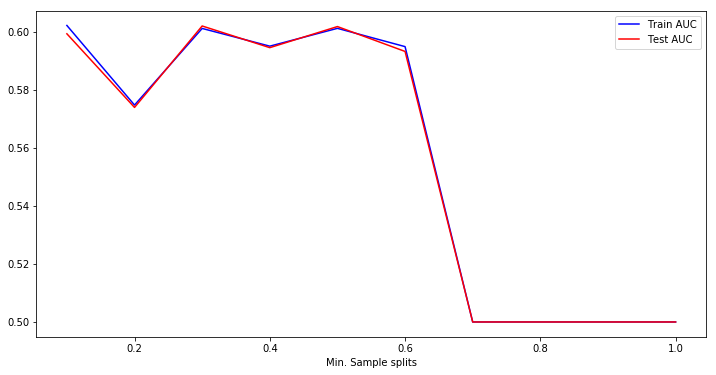

In [106]:
# # Identify the optimal tree depth for given data
# min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
# train_results = []
# test_results = []
# for min_samples_split in min_samples_splits:
#     dt = RandomForestClassifier(min_samples_split=min_samples_split)
#     dt.fit(X2_train, y2_train)
#     train_pred = dt.predict(X2_train)
#     false_positive_rate, true_positive_rate, thresholds = roc_curve(y2_train, train_pred)
#     roc_auc = auc(false_positive_rate, true_positive_rate)
#     # Add auc score to previous train results
#     train_results.append(roc_auc)
#     y_pred = dt.predict(X2_test)
#     false_positive_rate, true_positive_rate, thresholds = roc_curve(y2_test, y_pred)
#     roc_auc = auc(false_positive_rate, true_positive_rate)
#     # Add auc score to previous test results
#     test_results.append(roc_auc)
# plt.figure(figsize=(12,6))
# plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
# plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
# plt.xlabel('Min. Sample splits')
# plt.legend()
# plt.show()

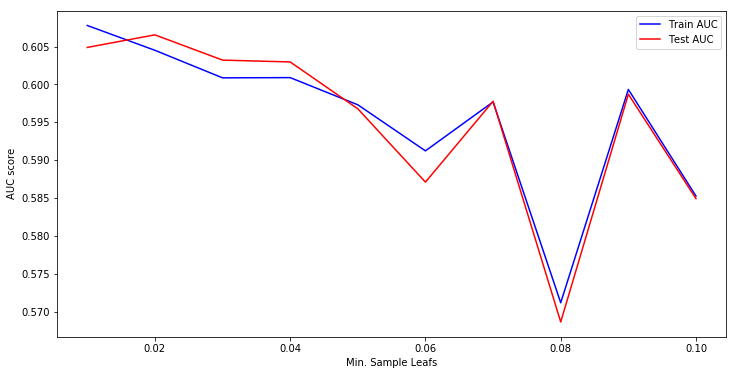

In [104]:
# min_samples_leafs = np.linspace(0.01, 0.1, 10, endpoint=True)
# train_results = []
# test_results = []
# for min_samples_leaf in min_samples_leafs:
#     dt = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
#     dt.fit(X2_train, y2_train)
#     train_pred = dt.predict(X2_train)
#     false_positive_rate, true_positive_rate, thresholds = roc_curve(y2_train, train_pred)
#     roc_auc = auc(false_positive_rate, true_positive_rate)
#     train_results.append(roc_auc)
#     y_pred = dt.predict(X2_test)
#     false_positive_rate, true_positive_rate, thresholds = roc_curve(y2_test, y_pred)
#     roc_auc = auc(false_positive_rate, true_positive_rate)
#     test_results.append(roc_auc)
    

# plt.figure(figsize=(12,6))    
# plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
# plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
# plt.ylabel('AUC score')
# plt.xlabel('Min. Sample Leafs')
# plt.legend()
# plt.show()    

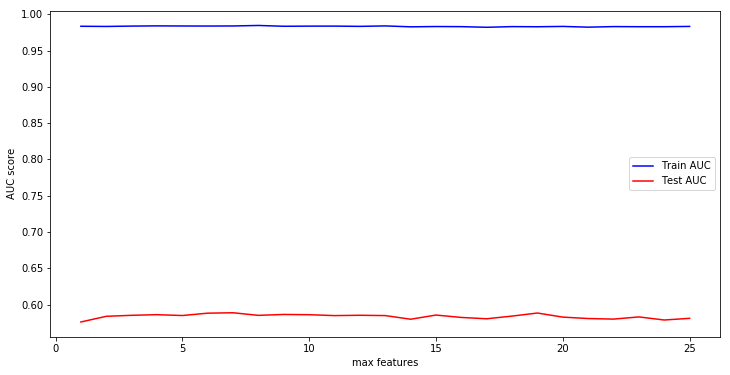

In [105]:
# # Find the best value for optimal maximum feature size
# max_features = list(range(1,X2_train.shape[1]))
# train_results = []
# test_results = []
# for max_feature in max_features:
#     dt = RandomForestClassifier(max_features=max_feature)
#     dt.fit(X2_train, y2_train)
#     train_pred = dt.predict(X2_train)
#     false_positive_rate, true_positive_rate, thresholds = roc_curve(y2_train, train_pred)
#     roc_auc = auc(false_positive_rate, true_positive_rate)
#     train_results.append(roc_auc)
#     y_pred = dt.predict(X2_test)
#     false_positive_rate, true_positive_rate, thresholds = roc_curve(y2_test, y_pred)
#     roc_auc = auc(false_positive_rate, true_positive_rate)
#     test_results.append(roc_auc)

    
# plt.figure(figsize=(12,6))
# plt.plot(max_features, train_results, 'b', label='Train AUC')
# plt.plot(max_features, test_results, 'r', label='Test AUC')

# plt.ylabel('AUC score')
# plt.xlabel('max features')
# plt.legend()
# plt.show()    

In [101]:
# train a classifier with optimal values identified above
dt = RandomForestClassifier(max_features=5,
                           max_depth=5,
                           min_samples_split=0.1,
                           min_samples_leaf=0.01, 
                           random_state=25)
dt.fit(X2_train, y2_train)
y2_pred = dt.predict(X2_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y2_test, y2_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6051024688216309

In [102]:
confusion_matrix(y2_test, y2_pred)

array([[ 5002,  6433],
       [ 2968, 10094]])

In [103]:
recall_score(y2_test, y2_pred)

0.7727759914255091

### Run GridSearchCV on RandomForestClassifier to optimize for Recall

In [104]:
# clf = RandomForestClassifier(random_state=25)

# param_grid = {
#     "criterion": ["gini", "entropy"],
#     "max_depth": [1, 2, 5, 10, 15],
#     'min_samples_split': np.linspace(0.01, 0.5, 10),
#     'min_samples_leaf': np.linspace(0.01, 0.02, 10)
# }

# gs_tree = GridSearchCV(clf, param_grid, scoring='recall', cv=3, verbose=True)
# gs_tree.fit(X2_train, y2_train)

# gs_tree.best_params_

#### Results:
{'criterion': 'entropy',
 'max_depth': 1,
 'min_samples_leaf': 0.01,
 'min_samples_split': 0.01}

In [105]:
dt = RandomForestClassifier(criterion='entropy', max_depth=1, min_samples_split=0.01, min_samples_leaf=0.01)
dt.fit(X2_train, y2_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=1, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.01, min_samples_split=0.01,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [106]:
y2_pred = dt.predict(X2_test)
fpr, tpr, thresholds = roc_curve(y2_test, y2_pred)
roc_auc = auc(fpr, tpr)
print(roc_auc)
y2_train_preds = dt.predict(X2_train)
y2_test_preds = dt.predict(X2_test)

0.5


In [107]:
confusion_matrix(y2_test, y2_test_preds)

array([[    0, 11435],
       [    0, 13062]])

In [108]:
random = RandomForestClassifier(random_state=25)
random.fit(X2_train, y2_train)
y2_pred = dt.predict(X2_test)
fpr, tpr, thresholds = roc_curve(y2_test, y2_pred)
roc_auc = auc(fpr, tpr)
roc_auc

0.5

In [109]:
y2_train_preds = random.predict(X2_train)
y2_test_preds = random.predict(X2_test)

In [110]:
def print_metrics(y_train, y_test, y_train_preds, y_test_preds):
    
    """Accepts train and test set predictions and prints evaluation metrics"""
    
    print('Train Set Classification Report')
    print(classification_report(y_train, y_train_preds))
    print('*'*50)
    print('Test Set Classification Report')
    print(classification_report(y_test, y_test_preds))
    print('*'*50)
    print('Train Set Confusion Matrix')
    print(confusion_matrix(y_train, y_train_preds))
    print('*'*50)
    print('Test Set Confusion Matrix')
    print(confusion_matrix(y_test, y_test_preds))
    print('*'*50)
    print('Train Set Accuracy Score')
    print(accuracy_score(y_train, y_train_preds))
    print('*'*50)
    print('Test Set Accuracy Score')
    print(accuracy_score(y_test, y_test_preds))
    print('*'*50)
    print('Train Set Recall SCore')
    print(recall_score(y_train, y_train_preds))
    print('*'*50)
    print('Test Set Recall Score')
    print(recall_score(y_test, y_test_preds))

In [111]:
print_metrics(y2_train, y2_test, y2_train_preds, y2_test_preds)

Train Set Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     34150
           1       0.99      0.98      0.98     39340

   micro avg       0.98      0.98      0.98     73490
   macro avg       0.98      0.98      0.98     73490
weighted avg       0.98      0.98      0.98     73490

**************************************************
Test Set Classification Report
              precision    recall  f1-score   support

           0       0.55      0.60      0.58     11435
           1       0.62      0.57      0.59     13062

   micro avg       0.58      0.58      0.58     24497
   macro avg       0.58      0.59      0.58     24497
weighted avg       0.59      0.58      0.58     24497

**************************************************
Train Set Confusion Matrix
[[33847   303]
 [  943 38397]]
**************************************************
Test Set Confusion Matrix
[[6914 4521]
 [5671 7391]]
*******************

In [112]:
dtclf = DecisionTreeClassifier(random_state=25)
dtclf.fit(X2_train, y2_train)
y2_pred = dtclf.predict(X2_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y2_test, y2_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5530986756712478

In [113]:
y2_train_preds = dtclf.predict(X2_train)
y2_test_preds = dtclf.predict(X2_test)

In [114]:
print_metrics(y2_train, y2_test, y2_train_preds, y2_test_preds)

Train Set Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34150
           1       1.00      1.00      1.00     39340

   micro avg       1.00      1.00      1.00     73490
   macro avg       1.00      1.00      1.00     73490
weighted avg       1.00      1.00      1.00     73490

**************************************************
Test Set Classification Report
              precision    recall  f1-score   support

           0       0.52      0.52      0.52     11435
           1       0.58      0.59      0.58     13062

   micro avg       0.56      0.56      0.56     24497
   macro avg       0.55      0.55      0.55     24497
weighted avg       0.56      0.56      0.56     24497

**************************************************
Train Set Confusion Matrix
[[34150     0]
 [   47 39293]]
**************************************************
Test Set Confusion Matrix
[[5954 5481]
 [5414 7648]]
*******************

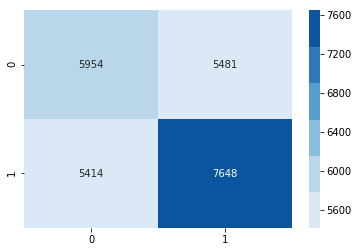

In [115]:
cm = confusion_matrix(y2_test, y2_test_preds)
sns.heatmap(cm, annot=True, cmap=sns.color_palette('Blues'), fmt='0.16g')

In [116]:
# dtclf = DecisionTreeClassifier(random_state=25)

# param_grid = {
#     "criterion": ["gini", "entropy"],
#     "max_depth": [1, 2, 5, 10, 15],
#     'min_samples_split': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25],
#     'min_samples_leaf': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25]
# }

# gs_tree = GridSearchCV(dtclf, param_grid, scoring=make_scorer(f1_score), cv=3, verbose=True)
# gs_tree.fit(X2_train, y2_train)

# gs_tree.best_params_

### Results:
{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 0.01,
 'min_samples_split': 0.05}

In [117]:
dtclf = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=0.05, min_samples_leaf=0.01)
dtclf.fit(X2_train, y2_train)
y2_pred = dtclf.predict(X2_test)
fpr, tpr, thresholds = roc_curve(y2_test, y2_pred)
roc_auc = auc(fpr, tpr)
roc_auc

0.6023420541111756

In [118]:
y2_train_preds = dtclf.predict(X2_train)
y2_test_preds = dtclf.predict(X2_test)

In [119]:
print_metrics(y2_train, y2_test, y2_train_preds, y2_test_preds)

Train Set Classification Report
              precision    recall  f1-score   support

           0       0.65      0.39      0.49     34150
           1       0.61      0.82      0.70     39340

   micro avg       0.62      0.62      0.62     73490
   macro avg       0.63      0.60      0.59     73490
weighted avg       0.63      0.62      0.60     73490

**************************************************
Test Set Classification Report
              precision    recall  f1-score   support

           0       0.65      0.39      0.49     11435
           1       0.60      0.82      0.69     13062

   micro avg       0.62      0.62      0.62     24497
   macro avg       0.63      0.60      0.59     24497
weighted avg       0.62      0.62      0.60     24497

**************************************************
Train Set Confusion Matrix
[[13244 20906]
 [ 7141 32199]]
**************************************************
Test Set Confusion Matrix
[[ 4453  6982]
 [ 2413 10649]]
***************

In [120]:
recall_score(y2_test, y2_test_preds)

0.815265656101669

In [121]:
f1_score(y2_train, y2_train_preds)

0.6966087944183028

In [122]:
f1_score(y2_test, y2_test_preds)

0.6939041475254945

In [123]:
adaboost_clf = AdaBoostClassifier()
gbt_clf = GradientBoostingClassifier()

In [124]:
adaboost_clf.fit(X2_train, y2_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [125]:
gbt_clf.fit(X2_train, y2_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [126]:
adaboost_train_preds = adaboost_clf.predict(X2_train)
adaboost_test_preds = adaboost_clf.predict(X2_test)
gbt_clf_train_preds = gbt_clf.predict(X2_train)
gbt_clf_test_preds = gbt_clf.predict(X2_test)

In [127]:
def display_acc_and_f1_score(true, preds, model_name):
    acc = accuracy_score(true, preds)
    f1 = f1_score(true, preds)
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    print("F1-Score: {}".format(f1))
    
print("Training Metrics")
display_acc_and_f1_score(y2_train, adaboost_train_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y2_train, gbt_clf_train_preds, model_name='Gradient Boosted Trees')
print("")
print("Recall Score Adaboost: ", recall_score(y2_train, adaboost_train_preds))
print("Recall Score Gradient Boosted Trees: ", recall_score(y2_train, gbt_clf_train_preds))
print("")
print("Testing Metrics")
display_acc_and_f1_score(y2_test, adaboost_test_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y2_test, gbt_clf_test_preds, model_name='Gradient Boosted Trees')
print("")
print("Recall Test Score Adaboost: ", recall_score(y2_test, adaboost_test_preds))
print("Recall Test Score Gradient Boosted Trees: ", recall_score(y2_test, gbt_clf_test_preds))
print("")
print("Precision Test Score Adaboost: ", precision_score(y2_test, adaboost_test_preds))
print("Precision Test Score Gradient Boosted Trees: ", precision_score(y2_test, gbt_clf_test_preds))

Training Metrics
Model: AdaBoost
Accuracy: 0.6256225336780514
F1-Score: 0.6917414540687709

Model: Gradient Boosted Trees
Accuracy: 0.6313512042454755
F1-Score: 0.6906317087653588

Recall Score Adaboost:  0.7846975088967971
Recall Score Gradient Boosted Trees:  0.7686832740213523

Testing Metrics
Model: AdaBoost
Accuracy: 0.622198636567743
F1-Score: 0.6881843603652168

Model: Gradient Boosted Trees
Accuracy: 0.6273013022002695
F1-Score: 0.6864482450717769

Recall Test Score Adaboost:  0.7818863879957128
Recall Test Score Gradient Boosted Trees:  0.7651201959883632

Precision Test Score Adaboost:  0.6145375774715687
Precision Test Score Gradient Boosted Trees:  0.622446437468859


In [128]:
adaboost_confusion_matrix = confusion_matrix(y2_test, adaboost_test_preds)
adaboost_confusion_matrix

array([[ 5029,  6406],
       [ 2849, 10213]])

In [129]:
gbt_confusion_matrix = confusion_matrix(y2_test, gbt_clf_test_preds)
gbt_confusion_matrix

array([[5373, 6062],
       [3068, 9994]])

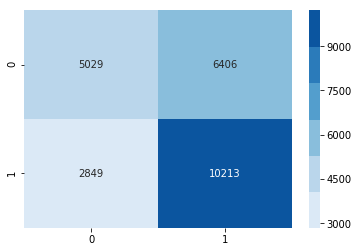

In [130]:
sns.heatmap(adaboost_confusion_matrix, annot=True, cmap=sns.color_palette('Blues'), fmt='0.16g')

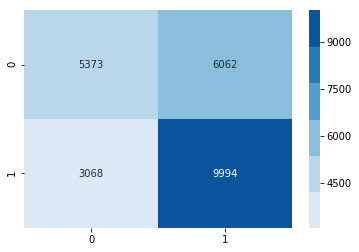

In [131]:
sns.heatmap(gbt_confusion_matrix, annot=True, cmap=sns.color_palette('Blues'), fmt='0.16g')

In [132]:
adaboost_classification_report = classification_report(y2_test, adaboost_test_preds)
print(adaboost_classification_report)

              precision    recall  f1-score   support

           0       0.64      0.44      0.52     11435
           1       0.61      0.78      0.69     13062

   micro avg       0.62      0.62      0.62     24497
   macro avg       0.63      0.61      0.60     24497
weighted avg       0.63      0.62      0.61     24497



In [133]:
gbt_classification_report = classification_report(y2_test, gbt_clf_test_preds)
print(gbt_classification_report)

              precision    recall  f1-score   support

           0       0.64      0.47      0.54     11435
           1       0.62      0.77      0.69     13062

   micro avg       0.63      0.63      0.63     24497
   macro avg       0.63      0.62      0.61     24497
weighted avg       0.63      0.63      0.62     24497



In [134]:
def plot_feature_importances_adaboost(model, figsize=(12,12)):
    
    """Visualize feature importance of selected model as determined by feature_importances_ method."""
    
    n_features = X2_train.shape[1]
    plt.figure(figsize=figsize)
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X2_train.columns.values) 
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")

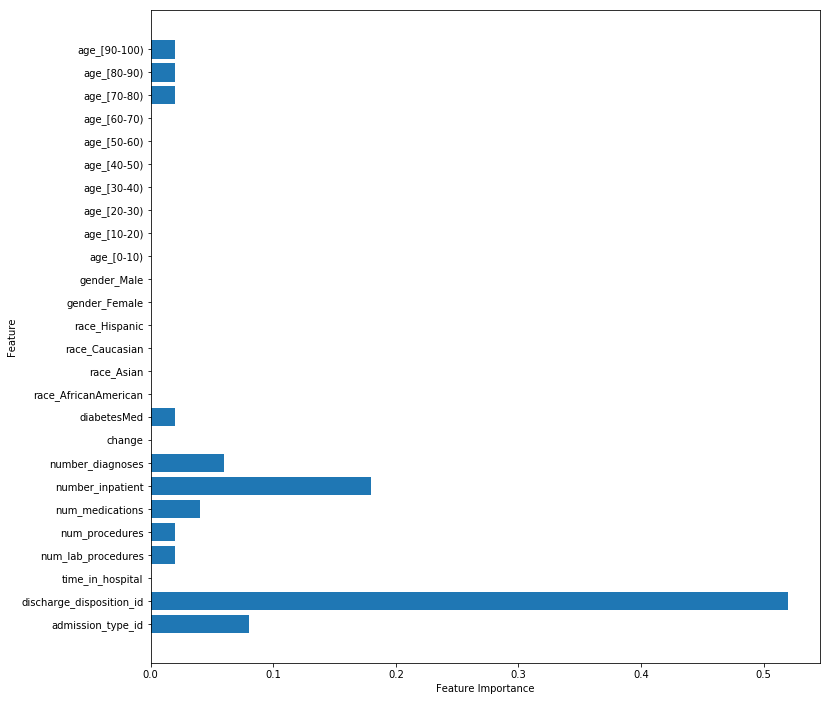

In [135]:
plot_feature_importances_adaboost(adaboost_clf)

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97987 entries, 0 to 101765
Data columns (total 14 columns):
race                        97987 non-null object
gender                      97987 non-null object
age                         97987 non-null object
admission_type_id           97987 non-null int64
discharge_disposition_id    97987 non-null int64
time_in_hospital            97987 non-null int64
num_lab_procedures          97987 non-null int64
num_procedures              97987 non-null int64
num_medications             97987 non-null int64
number_inpatient            97987 non-null int64
number_diagnoses            97987 non-null int64
change                      97987 non-null int64
diabetesMed                 97987 non-null int64
readmitted                  97987 non-null object
dtypes: int64(10), object(4)
memory usage: 11.2+ MB


In [137]:
data.drop(columns=['race', 'gender', 'age', 'change', 'time_in_hospital'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97987 entries, 0 to 101765
Data columns (total 9 columns):
admission_type_id           97987 non-null int64
discharge_disposition_id    97987 non-null int64
num_lab_procedures          97987 non-null int64
num_procedures              97987 non-null int64
num_medications             97987 non-null int64
number_inpatient            97987 non-null int64
number_diagnoses            97987 non-null int64
diabetesMed                 97987 non-null int64
readmitted                  97987 non-null object
dtypes: int64(8), object(1)
memory usage: 7.5+ MB


In [138]:
features_final = data.drop(columns='readmitted')
target_final = data.readmitted

In [139]:
target_final = target_final.replace('NO', 1)
target_final = target_final.replace('>30', 0)
target_final = target_final.replace('<30', 0)
target_final.value_counts()

1    52402
0    45585
Name: readmitted, dtype: int64

In [140]:
features_final = pd.get_dummies(features_final)
features_final.head()

,admission_type_id,discharge_disposition_id,num_lab_procedures,num_procedures,num_medications,number_inpatient,number_diagnoses,diabetesMed
0,6,25,41,0,1,0,1,0
1,1,1,59,0,18,0,9,1
2,1,1,11,5,13,1,6,1
3,1,1,44,1,16,0,7,1
4,1,1,51,0,8,0,5,1


In [141]:
scaler = StandardScaler()
scaled_final_features = scaler.fit_transform(features_final)

In [142]:
df_final = pd.DataFrame(scaled_final_features, index=features_final.index, columns=features_final.columns)
df_final.head()

,admission_type_id,discharge_disposition_id,num_lab_procedures,num_procedures,num_medications,number_inpatient,number_diagnoses,diabetesMed
0,2.740623,4.000630,-0.105086,-0.78615,-1.853242,-0.506680,-3.348557,-1.820477
1,-0.707094,-0.516886,0.810039,-0.78615,0.241579,-0.506680,0.809140,0.549307
2,-0.707094,-0.516886,-1.630296,2.15245,-0.374545,0.277649,-0.749996,0.549307
3,-0.707094,-0.516886,0.047435,-0.19843,-0.004871,-0.506680,-0.230284,0.549307
4,-0.707094,-0.516886,0.403317,-0.78615,-0.990669,-0.506680,-1.269709,0.549307


In [143]:
final_features = df_final

1    52402
0    45585
Name: readmitted, dtype: int64


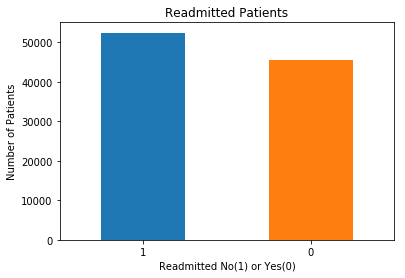

In [144]:
print(target_final.value_counts())
target_final.value_counts().plot(kind='bar')
plt.title('Readmitted Patients')
plt.xlabel('Readmitted No(1) or Yes(0)')
plt.ylabel('Number of Patients')
plt.xticks(rotation='horizontal');

In [145]:
X_final = final_features
y_final = target_final

In [146]:
X_final_train, X_final_test, y_final_train, y_final_test = train_test_split(X_final, y_final, random_state=25)

In [147]:
print(X_final_train.shape, X_final_test.shape)
print('-'*25)
print(y_final_train.shape, y_final_test.shape)

(73490, 8) (24497, 8)
-------------------------
(73490,) (24497,)


In [148]:
adaboost_clf = AdaBoostClassifier()
gbt_clf = GradientBoostingClassifier()

In [149]:
adaboost_clf.fit(X_final_train, y_final_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [150]:
gbt_clf.fit(X_final_train, y_final_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [151]:
adaboost_final_train_preds = adaboost_clf.predict(X_final_train)
adaboost_final_test_preds = adaboost_clf.predict(X_final_test)
gbt_final_clf_train_preds = gbt_clf.predict(X_final_train)
gbt_final_clf_test_preds = gbt_clf.predict(X_final_test)

In [152]:
def display_scores(true, preds, model_name):
    acc = accuracy_score(true, preds)
    f1 = f1_score(true, preds)
    recall = recall_score(true, preds)
    precision = precision_score(true, preds)
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    print("Recall: {}".format(recall))
    print("Precision: {}".format(precision))
    print("F1-Score: {}".format(f1))
    
print("Training Metrics")
display_scores(y_final_train, adaboost_final_train_preds, model_name='AdaBoost')
print("")
display_scores(y_final_train, gbt_final_clf_train_preds, model_name='Gradient Boosted Trees')
print("")
print("Testing Metrics")
display_scores(y_final_test, adaboost_final_test_preds, model_name='AdaBoost')
print("")
display_scores(y_final_test, gbt_final_clf_test_preds, model_name='Gradient Boosted Trees')
print("")

Training Metrics
Model: AdaBoost
Accuracy: 0.6249285617090761
Recall: 0.781240467717336
Precision: 0.6184898977702649
F1-Score: 0.6904034504447839

Model: Gradient Boosted Trees
Accuracy: 0.6290107497618723
Recall: 0.7651753940010168
Precision: 0.6254571143617021
F1-Score: 0.6882974344903279

Testing Metrics
Model: AdaBoost
Accuracy: 0.6210964607911172
Recall: 0.7769866789159394
Precision: 0.614420632037777
F1-Score: 0.6862068965517242

Model: Gradient Boosted Trees
Accuracy: 0.6248520226966567
Recall: 0.7633593630378196
Precision: 0.6204729309271936
F1-Score: 0.684539338184814



In [153]:
adaboost_confusion_matrix = confusion_matrix(y_final_test, adaboost_final_test_preds)
adaboost_confusion_matrix

array([[ 5066,  6369],
       [ 2913, 10149]])

In [154]:
gbt_confusion_matrix = confusion_matrix(y_final_test, gbt_final_clf_test_preds)
gbt_confusion_matrix

array([[5336, 6099],
       [3091, 9971]])

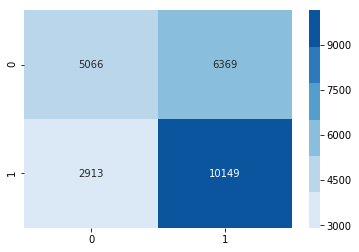

In [155]:
sns.heatmap(adaboost_confusion_matrix, annot=True, cmap=sns.color_palette('Blues'), fmt='0.16g')

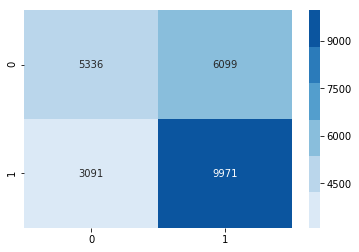

In [156]:
sns.heatmap(gbt_confusion_matrix, annot=True, cmap=sns.color_palette('Blues'), fmt='0.16g')

In [157]:
def plot_feature_importances_final(model, figsize=(12,12)):
    
    """Visualize feature importance of selected model as determined by feature_importances_ method."""
    
    n_features = X_final_train.shape[1]
    plt.figure(figsize=figsize)
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_final_train.columns.values) 
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")

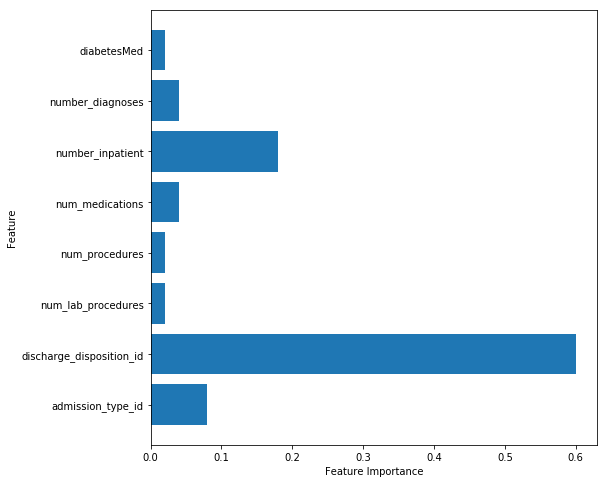

In [158]:
plot_feature_importances_final(adaboost_clf, figsize=(8, 8))

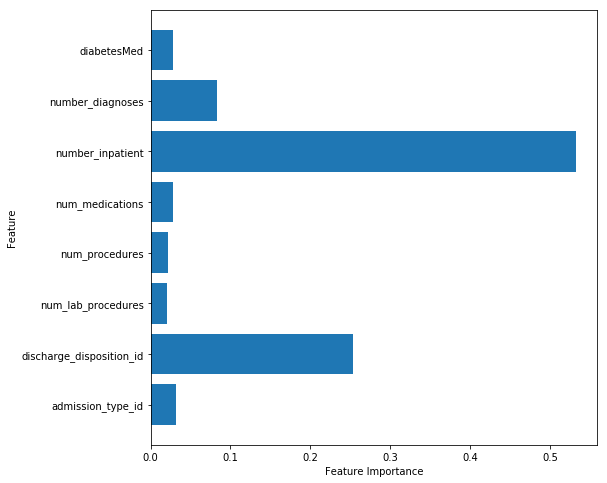

In [159]:
plot_feature_importances_final(gbt_clf, figsize=(8,8))

# Set up Final Data to Pick Best Model

In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97987 entries, 0 to 101765
Data columns (total 9 columns):
admission_type_id           97987 non-null int64
discharge_disposition_id    97987 non-null int64
num_lab_procedures          97987 non-null int64
num_procedures              97987 non-null int64
num_medications             97987 non-null int64
number_inpatient            97987 non-null int64
number_diagnoses            97987 non-null int64
diabetesMed                 97987 non-null int64
readmitted                  97987 non-null object
dtypes: int64(8), object(1)
memory usage: 7.5+ MB


In [161]:
print("Adaboost Scores")
display_scores(y_final_train, adaboost_final_train_preds, model_name="Adaboost Train")
print("")
display_scores(y_final_test, adaboost_final_test_preds, model_name="Adaboost Test")

Adaboost Scores
Model: Adaboost Train
Accuracy: 0.6249285617090761
Recall: 0.781240467717336
Precision: 0.6184898977702649
F1-Score: 0.6904034504447839

Model: Adaboost Test
Accuracy: 0.6210964607911172
Recall: 0.7769866789159394
Precision: 0.614420632037777
F1-Score: 0.6862068965517242


In [162]:
print("Gradient Boosted Tree Scores")
display_scores(y_final_train, gbt_final_clf_train_preds, model_name="Gradient Boosted Train")
print("")
display_scores(y_final_test, gbt_final_clf_test_preds, model_name="Gradient Boosted Test")

Gradient Boosted Tree Scores
Model: Gradient Boosted Train
Accuracy: 0.6290107497618723
Recall: 0.7651753940010168
Precision: 0.6254571143617021
F1-Score: 0.6882974344903279

Model: Gradient Boosted Test
Accuracy: 0.6248520226966567
Recall: 0.7633593630378196
Precision: 0.6204729309271936
F1-Score: 0.684539338184814


In [163]:
dtclf = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=0.05, min_samples_leaf=0.01)
dtclf.fit(X_final_train, y_final_train)
y_final_pred = dtclf.predict(X_final_test)
fpr, tpr, thresholds = roc_curve(y_final_test, y_final_pred)
roc_auc = auc(fpr, tpr)
print("roc_auc score: ", roc_auc)
print("")
y2_train_preds = dtclf.predict(X_final_train)
y2_test_preds = dtclf.predict(X_final_test)

roc_auc score:  0.6023420541111756



In [164]:
print("Optimized Decision Tree Scores")
display_scores(y_final_train, y2_train_preds, model_name="Optimized Decision Tree - Train")
print("")
display_scores(y_final_test, y2_test_preds, model_name="Optimized Decision Tree - Test")

Optimized Decision Tree Scores
Model: Optimized Decision Tree - Train
Accuracy: 0.618356238944074
Recall: 0.8184799186578546
Precision: 0.6063270878448357
F1-Score: 0.6966087944183028

Model: Optimized Decision Tree - Test
Accuracy: 0.6164836510593134
Recall: 0.815265656101669
Precision: 0.6039929669332426
F1-Score: 0.6939041475254945


In [165]:
dtclf = DecisionTreeClassifier(random_state=25)
dtclf.fit(X_final_train, y_final_train)
y_final_pred = dtclf.predict(X_final_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_final_test, y_final_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)
y2_train_preds = dtclf.predict(X_final_train)
y2_test_preds = dtclf.predict(X_final_test)

0.5469935152366397


In [166]:
print("Vanilla Decision Tree Scores")
display_scores(y_final_train, y2_train_preds, model_name="Vanilla Decision Tree - Train")
print("")
display_scores(y_final_test, y2_test_preds, model_name="Vanilla Decision Tree - Test")

Vanilla Decision Tree Scores
Model: Vanilla Decision Tree - Train
Accuracy: 0.9627976595455164
Recall: 0.9437976614133198
Precision: 0.9861096356103262
F1-Score: 0.964489817123857

Model: Vanilla Decision Tree - Test
Accuracy: 0.5481079315834592
Recall: 0.5637727759914255
Precision: 0.5782035175879398
F1-Score: 0.5708969687572679


### Scores: Adaboost

**RECALL** - Most important for our study, Test score for Recall is 77.69%

**F1-Score** - 68.62% for Test score

### Scores: Gradient Boosted Tree

**RECALL** - Most important for our study, Test score for recall is 76.33%

**F1-Score** - 68.45% for Test score

### Scores: Optimized Decision Tree -- BEST SCORES

**RECALL** - Most important for our study, Test score for recall is 81.53%

**F1-Score** - 69.39% for Test score

### Scores: Vanilla Decision Tree

**RECALL** - Most important for our study, Test score for recall is 56.38%

**F1-Score** - 57.09% for Test score

In [205]:
# dtclf = DecisionTreeClassifier(random_state=25)

# op_param_grid = {
#     "criterion": ["gini"],
#     "max_depth": np.linspace(4, 6, 12),
#     'min_samples_split': np.linspace(0.04, 0.06, 12),
#     'min_samples_leaf': np.linspace(0.005, 0.02, 14)
# }

# gs_tree = GridSearchCV(dtclf, op_param_grid, scoring='recall', cv=5, verbose=True)
# gs_tree.fit(X_final_train, y_final_train)

# gs_tree.best_params_

Fitting 5 folds for each of 2016 candidates, totalling 10080 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10080 out of 10080 | elapsed:  9.4min finished


{'criterion': 'gini',
 'max_depth': 5.090909090909091,
 'min_samples_leaf': 0.005,
 'min_samples_split': 0.04}

max_depth - 4-6 @6
min_samples_split - 0.04-0.06 @6
min_samples_leaf - 0.005-0.02 @14
Result : gini, max_depth=5.2, min_samples_split=0.005, min_samples_leaf=0.04 --- 1.2 minutes

max_depth - 4-6 @12
min_samples_split - 0.04-0.06 @12
min_samples_leaf - 0.005, 0.02 @14
Result : gini, max_depth=5.090909090909091, min_samples_split=0.04, min_samples_leaf=0.005

In [167]:
dt_op1 = DecisionTreeClassifier(criterion='gini', max_depth=5.090909090909091, min_samples_split=0.04, min_samples_leaf=0.005, random_state=25)
dt_op1.fit(X_final_train, y_final_train)
y_final_pred = dt_op1.predict(X_final_test)
fpr, tpr, thresholds = roc_curve(y_final_test, y_final_pred)
roc_auc = auc(fpr, tpr)
print("roc_auc score: ", roc_auc)
print("")
y2_train_preds = dt_op1.predict(X_final_train)
y2_test_preds = dt_op1.predict(X_final_test)

roc_auc score:  0.6023420541111756



In [168]:
print("Re-Optimized (Again) Decision Tree Scores")
display_scores(y_final_train, y2_train_preds, model_name="Re-Optimized (Again) Decision Tree - Train")
print("")
display_scores(y_final_test, y2_test_preds, model_name="Re-Optimized (Again) Decision Tree - Test")

Re-Optimized (Again) Decision Tree Scores
Model: Re-Optimized (Again) Decision Tree - Train
Accuracy: 0.618356238944074
Recall: 0.8184799186578546
Precision: 0.6063270878448357
F1-Score: 0.6966087944183028

Model: Re-Optimized (Again) Decision Tree - Test
Accuracy: 0.6164836510593134
Recall: 0.815265656101669
Precision: 0.6039929669332426
F1-Score: 0.6939041475254945


In [169]:
dt_op2 = DecisionTreeClassifier(criterion='gini', max_depth=5.2, min_samples_split=0.005, min_samples_leaf=0.005, random_state=25)
dt_op2.fit(X_final_train, y_final_train)
y_final_pred = dt_op2.predict(X_final_test)
fpr, tpr, thresholds = roc_curve(y_final_test, y_final_pred)
roc_auc = auc(fpr, tpr)
print("roc_auc score: ", roc_auc)
print("")
y2_train_preds = dt_op2.predict(X_final_train)
y2_test_preds = dt_op2.predict(X_final_test)

roc_auc score:  0.6095225843287373



In [170]:
print("Re-Optimized (Before) Decision Tree Scores")
display_scores(y_final_train, y2_train_preds, model_name="Re-Optimized (Before) Decision Tree - Train")
print("")
display_scores(y_final_test, y2_test_preds, model_name="Re-Optimized (Before) Decision Tree - Test")

Re-Optimized (Before) Decision Tree Scores
Model: Re-Optimized (Before) Decision Tree - Train
Accuracy: 0.6229827187372432
Recall: 0.7906710726995424
Precision: 0.6150028669157918
F1-Score: 0.6918602711389392

Model: Re-Optimized (Before) Decision Tree - Test
Accuracy: 0.6213822100665387
Recall: 0.7880875822998009
Precision: 0.6127016249032796
F1-Score: 0.6894149951444932


## Reoptimized Decision Tree Classifier Scores:

**RECALL** - 81.52%

**F1-Score** - 69.39%

**Accuracy** - 61.83%

## What does this tell us??

### RECALL: 81.52% Indicates that we have LOW False Negatives, meaning that we have a low number of patients classified to NOT return to the hospital who DO return

##### How Does This Help Us: Our goal was to limit the number of false negatives, because from a hospital standpoint, it is easier to appropriately staff and plan for patients on a regular basis, when we know that a very small of the patients we anticipate not having to return for more treatment actually will return.  It would be much harder to budget for, and staff a hospital, if we had a larger number of antitipated patients returning who we were originally not anticipating.  The extra influx of patients means a harder time for doctors and hospital staff to accomodate other emergencies and patients, whereas if we are appropriately staffed, the hospital will not feel overwhelmed, leading to a better production from workplace staff.

In [171]:
data = pd.read_csv('diabetic_data.csv')
print(data.shape)
data.head()

(101766, 50)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [172]:
data.readmitted.value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

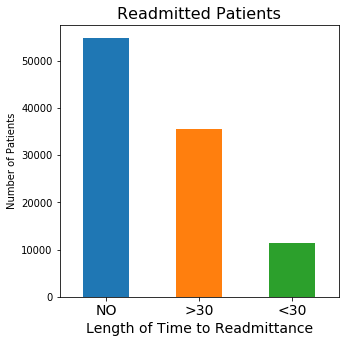

In [173]:
plt.figure(figsize=(5,5))
data.readmitted.value_counts().plot(kind='bar')
plt.title('Readmitted Patients', fontsize=16)
plt.xlabel('Length of Time to Readmittance', fontsize=14)
plt.xticks(rotation='horizontal', fontsize=14)
plt.ylabel('Number of Patients');

In [174]:
dt_op1 = DecisionTreeClassifier(criterion='gini', max_depth=5.090909090909091, min_samples_split=0.04, min_samples_leaf=0.005, random_state=25)
dt_op1.fit(X_final_train, y_final_train)
y_final_pred = dt_op1.predict(X_final_test)
fpr, tpr, thresholds = roc_curve(y_final_test, y_final_pred)
roc_auc = auc(fpr, tpr)
print("roc_auc score: ", roc_auc)
print("")
y_op_train_preds = dt_op1.predict(X_final_train)
y_op_test_preds = dt_op1.predict(X_final_test)

roc_auc score:  0.6023420541111756



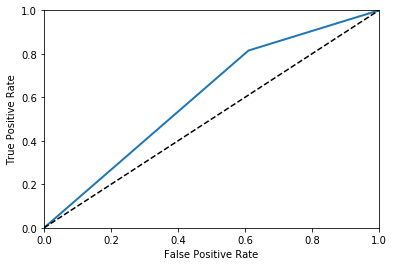

In [175]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()

In [176]:
print("Re-Optimized (Again) Decision Tree Scores")
display_scores(y_final_train, y_op_train_preds, model_name="Re-Optimized (Again) Decision Tree - Train")
print("")
display_scores(y_final_test, y_op_test_preds, model_name="Re-Optimized (Again) Decision Tree - Test")

Re-Optimized (Again) Decision Tree Scores
Model: Re-Optimized (Again) Decision Tree - Train
Accuracy: 0.618356238944074
Recall: 0.8184799186578546
Precision: 0.6063270878448357
F1-Score: 0.6966087944183028

Model: Re-Optimized (Again) Decision Tree - Test
Accuracy: 0.6164836510593134
Recall: 0.815265656101669
Precision: 0.6039929669332426
F1-Score: 0.6939041475254945


In [177]:
def plot_feature_importances_optimize(model, figsize=(12,12)):
    
    """Visualize feature importance of selected model as determined by feature_importances_ method."""
    
    n_features = X_final_train.shape[1]
    plt.figure(figsize=figsize)
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_final_train.columns.values) 
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")

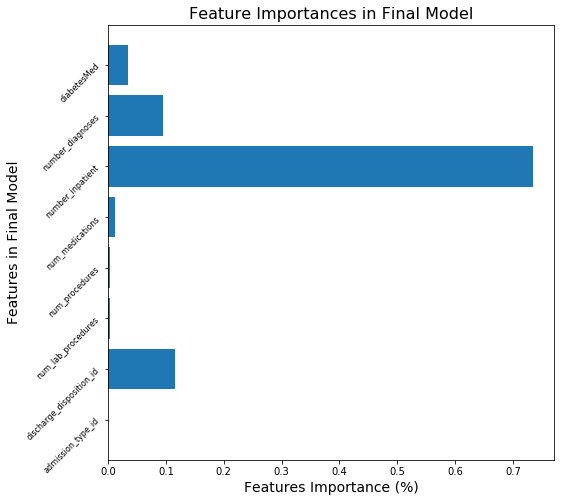

In [178]:
plot_feature_importances_optimize(dt_op1, figsize=(8,8))
plt.title('Feature Importances in Final Model', fontsize=16)
plt.xlabel('Features Importance (%)', fontsize=14)
plt.ylabel('Features in Final Model', fontsize=14)
plt.yticks(fontsize=8, rotation=45);

(24497,)


Text(51.0, 0.5, 'Actual Values')

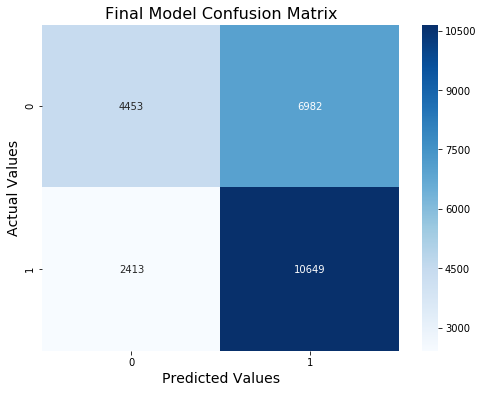

In [179]:
print(y_final_test.shape)
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_final_test, y_op_test_preds), cmap='Blues', annot=True, fmt='.16g')
plt.title('Final Model Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Values', fontsize=14)
plt.ylabel('Actual Values', fontsize=14)

In [180]:
data.number_inpatient.value_counts()

0     67630
1     19521
2      7566
3      3411
4      1622
5       812
6       480
7       268
8       151
9       111
10       61
11       49
12       34
13       20
14       10
15        9
16        6
19        2
17        1
18        1
21        1
Name: number_inpatient, dtype: int64

In [181]:
none = data.loc[data['number_inpatient']==0]
none.readmitted.value_counts()

NO     41596
>30    20328
<30     5706
Name: readmitted, dtype: int64

In [182]:
over = data.loc[data['number_inpatient']>0]
over.readmitted.value_counts()

>30    15217
NO     13268
<30     5651
Name: readmitted, dtype: int64

In [183]:
data.readmitted.value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [194]:
less = data.loc[data['readmitted'] == '<30']
print(less.shape[0])
less = (less.number_inpatient.value_counts())
less

11357


0     5706
1     2523
2     1319
3      692
4      383
5      255
6      166
7       95
8       67
9       47
11      33
10      26
12      17
13      10
15       9
14       4
16       2
19       1
17       1
21       1
Name: number_inpatient, dtype: int64

In [186]:
for i in less:
    print(round(100*(i/11357), 4))

50.2421
22.2154
11.614
6.0932
3.3724
2.2453
1.4617
0.8365
0.5899
0.4138
0.2906
0.2289
0.1497
0.0881
0.0792
0.0352
0.0176
0.0088
0.0088
0.0088


In [193]:
more = data.loc[data['readmitted'] == '>30']
print(more.shape[0])
more = (more.number_inpatient.value_counts())
more

35545


0     20328
1      8167
2      3594
3      1686
4       821
5       395
6       238
7       122
8        70
9        51
10       26
11       16
12       13
13        8
14        6
16        2
18        1
19        1
Name: number_inpatient, dtype: int64

In [191]:
for i in more:
    print(round(100*(i/35545), 4))

57.1895
22.9765
10.1111
4.7433
2.3097
1.1113
0.6696
0.3432
0.1969
0.1435
0.0731
0.045
0.0366
0.0225
0.0169
0.0056
0.0028
0.0028


In [192]:
none = data.loc[data['readmitted'] == 'NO']
print(none.shape[0])
none = (none.number_inpatient.value_counts())
none

54864


0     41596
1      8831
2      2653
3      1033
4       418
5       162
6        76
7        51
8        14
9        13
10        9
12        4
16        2
13        2
Name: number_inpatient, dtype: int64

In [195]:
for i in none:
    print(round(100*(i/54864), 4))

75.8166
16.0962
4.8356
1.8828
0.7619
0.2953
0.1385
0.093
0.0255
0.0237
0.0164
0.0073
0.0036
0.0036


In [ ]:
# Your code here
import numpy as np

def sigmoid(x):
    x = np.array(x)
    return 1/(1 + np.e**(-1*x))

def grad_desc(X, y, max_iterations, alpha, initial_weights=None):
    """Be sure to set default behavior for the initial_weights parameter."""
    if initial_weights == None:
        initial_weights = np.ones((X.shape[1],1)).flatten()
    weights = initial_weights
    #Create a for loop of iterations
    for iteration in range(max_iterations):
        #Generate predictions using the current feature weights
        predictions = sigmoid(np.dot(X,weights))
        #Calculate an error vector based on these initial predictions and the correct labels
        error_vector = y - predictions
        #Calculate the gradient 
        #As we saw in the previous lab, calculating the gradient is often the most difficult task.
        #Here, your are provided with the closed form solution for the gradient of the 
        #log-loss function derived from MLE
        #For more details on the derivation, see the additional resources section below.
        gradient = np.dot(X.transpose(),error_vector)
        #Update the weight vector take a step of alpha in direction of gradient 
        weights += alpha * gradient
    #Return finalized Weights
    return weights

weights = grad_desc(X_train, y_train, 50000, 0.001)